<a href="https://colab.research.google.com/github/Larissa-P-B/GSOceanCleanAI/blob/main/GSOceanCleanAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow
!pip install supervision

  Using cached supervision-0.20.0-py3-none-any.whl (110 kB)


In [ ]:
from roboflow import Roboflow
import supervision as sv
import cv2

In [ ]:
rf = Roboflow(api_key="dfVzGllbl2LJvZUdnJNY")
project = rf.workspace().project("oceancleanai")
model = project.version(5).model

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
result = model.predict("img3.png", confidence=40, overlap=30).json()

labels = [item["class"] for item in result["predictions"]]


SupervisionWarnings: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


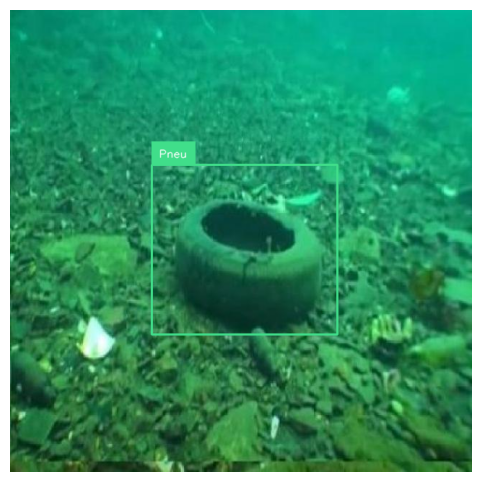

In [ ]:
detections = sv.Detections.from_roboflow(result)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()
box_annotator = sv.BoxAnnotator()

image = cv2.imread("img3.png")

annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(6, 6))